# Glass Identification

From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)

Dataset Characteristics:
Multivariate

Subject Area:
Physics and Chemistry

Associated Tasks:
Classification

Feature Type:
Real

Instances:
214

Features:
9

## Additional Information

Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not, the following results were obtained (# incorrect answers):

Type of Sample  -- Beagle -- NN -- DA
Windows that were float processed (87)  -- 10 -- 12 -- 21
Windows that were not:            (76) -- 19 -- 16 -- 22

The study of classification of types of glass was motivated by criminological investigation.  At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

![Alt Text](img1.jpg)

In [1]:
#!pip install ucimlrepo


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Jovan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print(glass_identification.metadata) 
  
# variable information 
print(glass_identification.variables)

{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [4]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
df = pd.merge(X,y,right_index=True,left_index=True)
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [9]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [10]:
df['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: xlabel='Type_of_glass'>

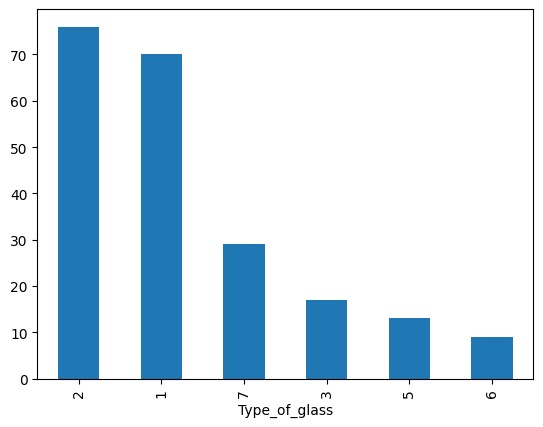

In [56]:
df['Type_of_glass'].value_counts().plot.bar()

In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Visualisation

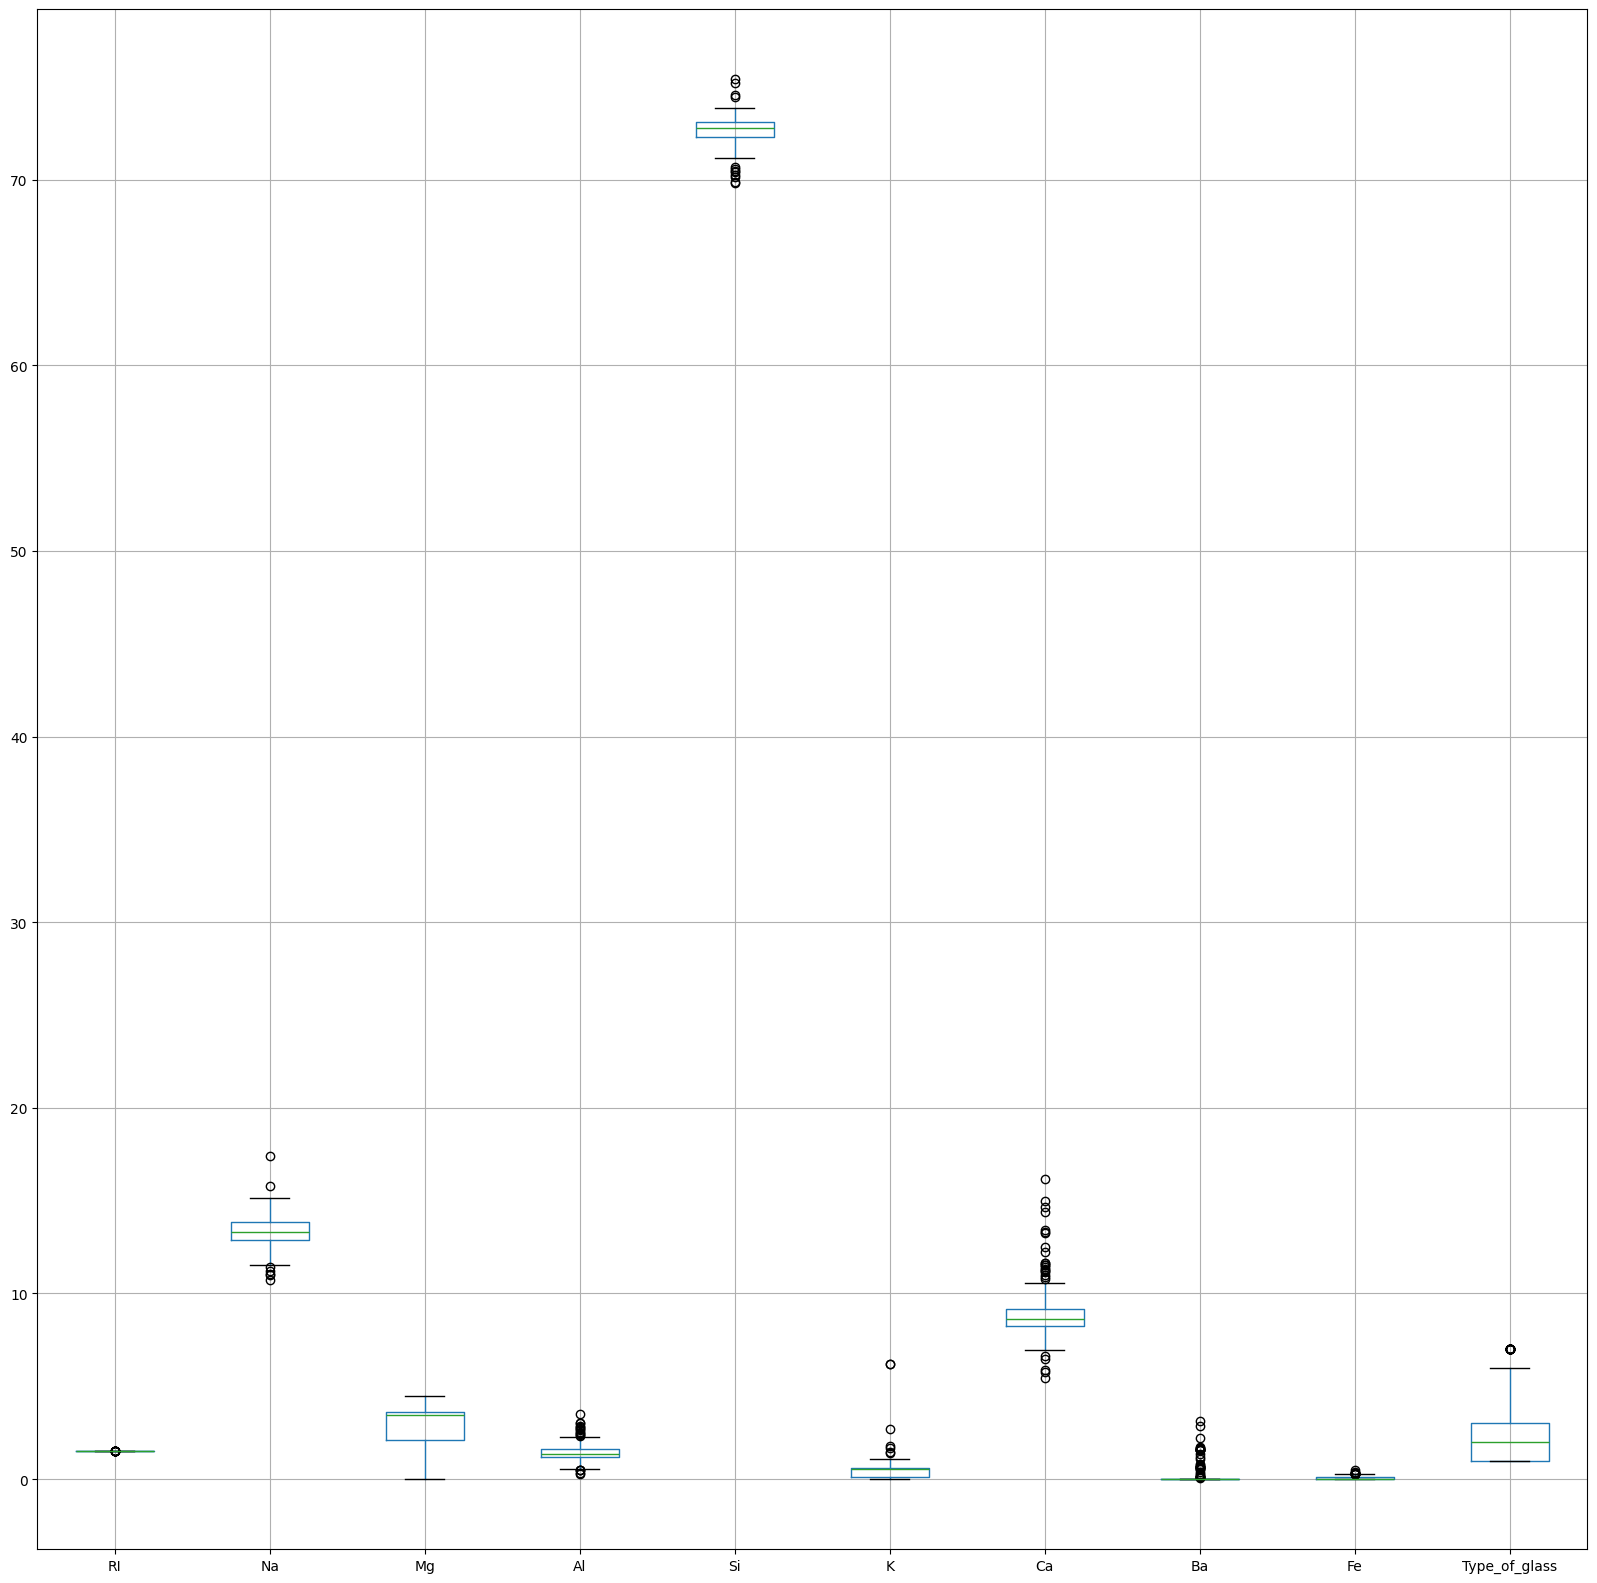

In [13]:
plt.figure(figsize=(20,20))
df.boxplot()
plt.show()

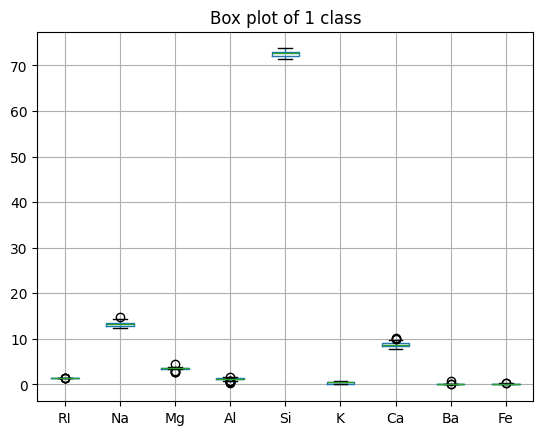

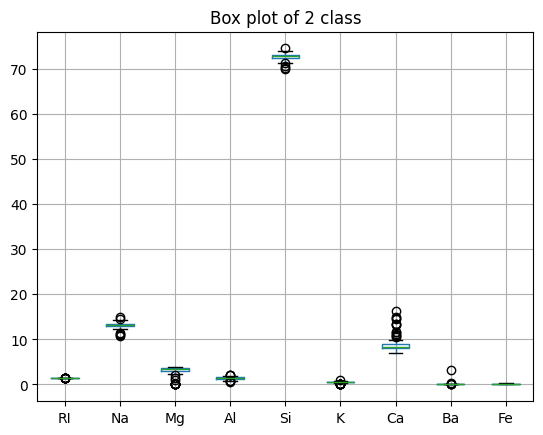

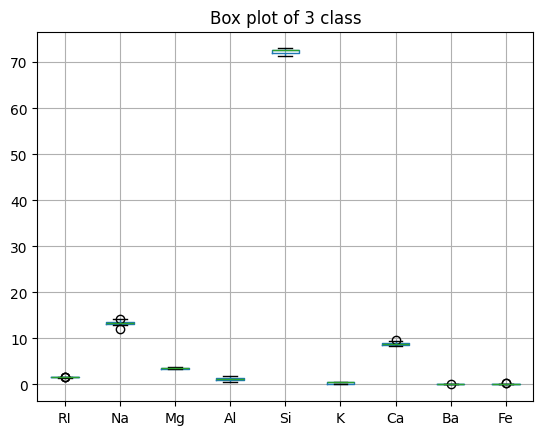

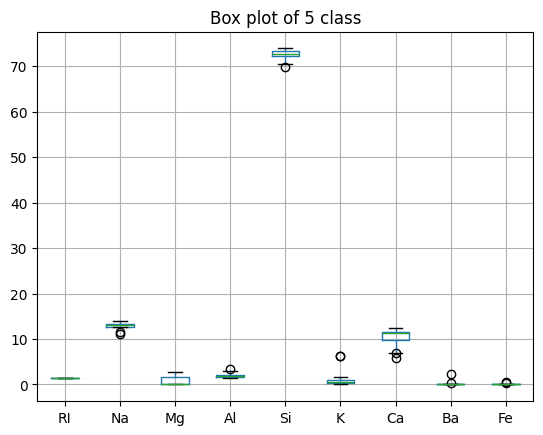

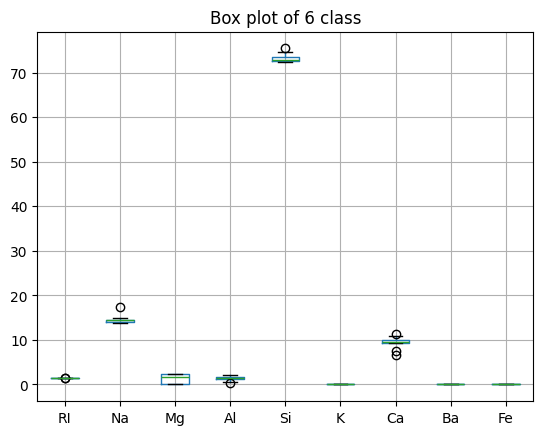

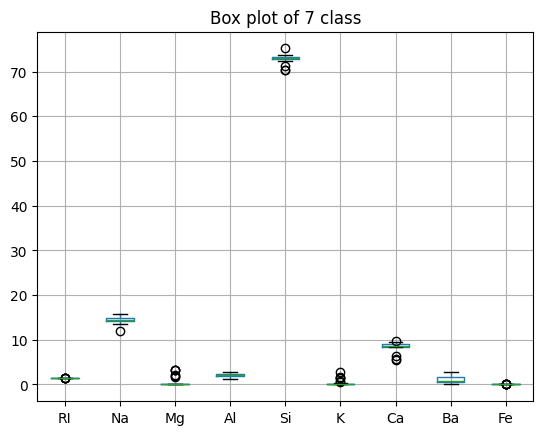

In [18]:
unique_classes = pd.unique(df['Type_of_glass'])
for i in unique_classes:
    df[df['Type_of_glass']==i].drop(columns='Type_of_glass',axis=1).boxplot()
    plt.title('Box plot of {} class'.format(i))
    plt.show()

Заклучок: Бидејќи outlier-те во овој случај не отстапуваат премногу од интервалите на секоја карактеристика следува дека нема да се направи никакво отфрлање на податоци.

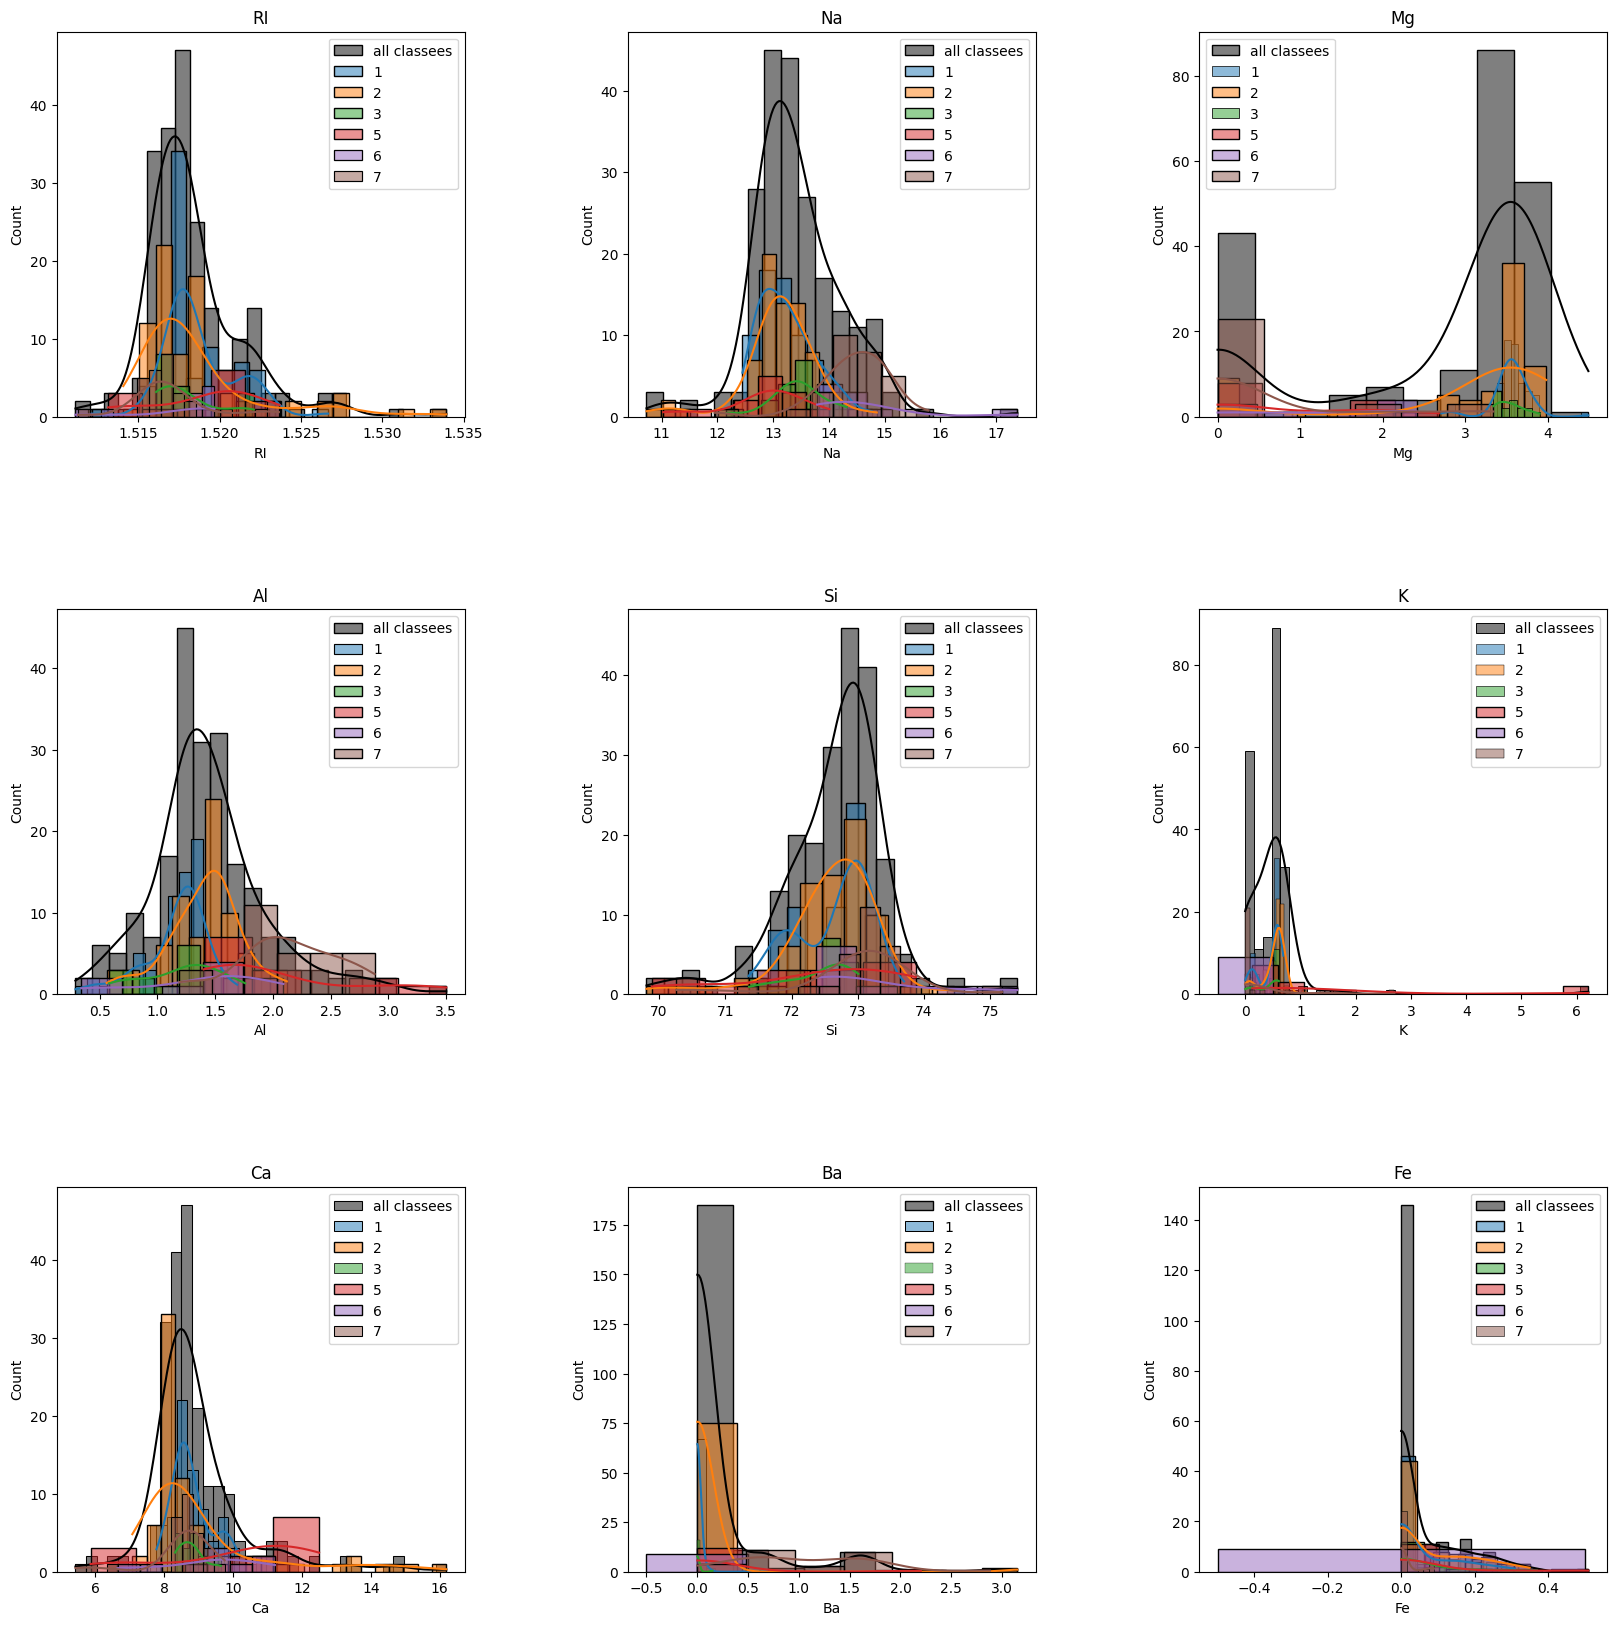

In [37]:
all_features = df.drop(columns=['Type_of_glass'],axis=1).columns
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4) 
n_features = len(all_features)
for f in range(n_features):
    ax = plt.subplot(3,3,f+1)
    plt.title(all_features[f])
    sns.histplot(df[all_features[f]],color='black',label='all classees',kde=True,stat="count") 
    for t in range(len(unique_classes)): # се прикажува хистограм на вредностите на соодветниот атрибут за секоја класа посебно
        sns.histplot(df[df['Type_of_glass'] == unique_classes[t]][all_features[f]], 
                 label=unique_classes[t], kde=True, stat="count")
    plt.legend()
plt.show()

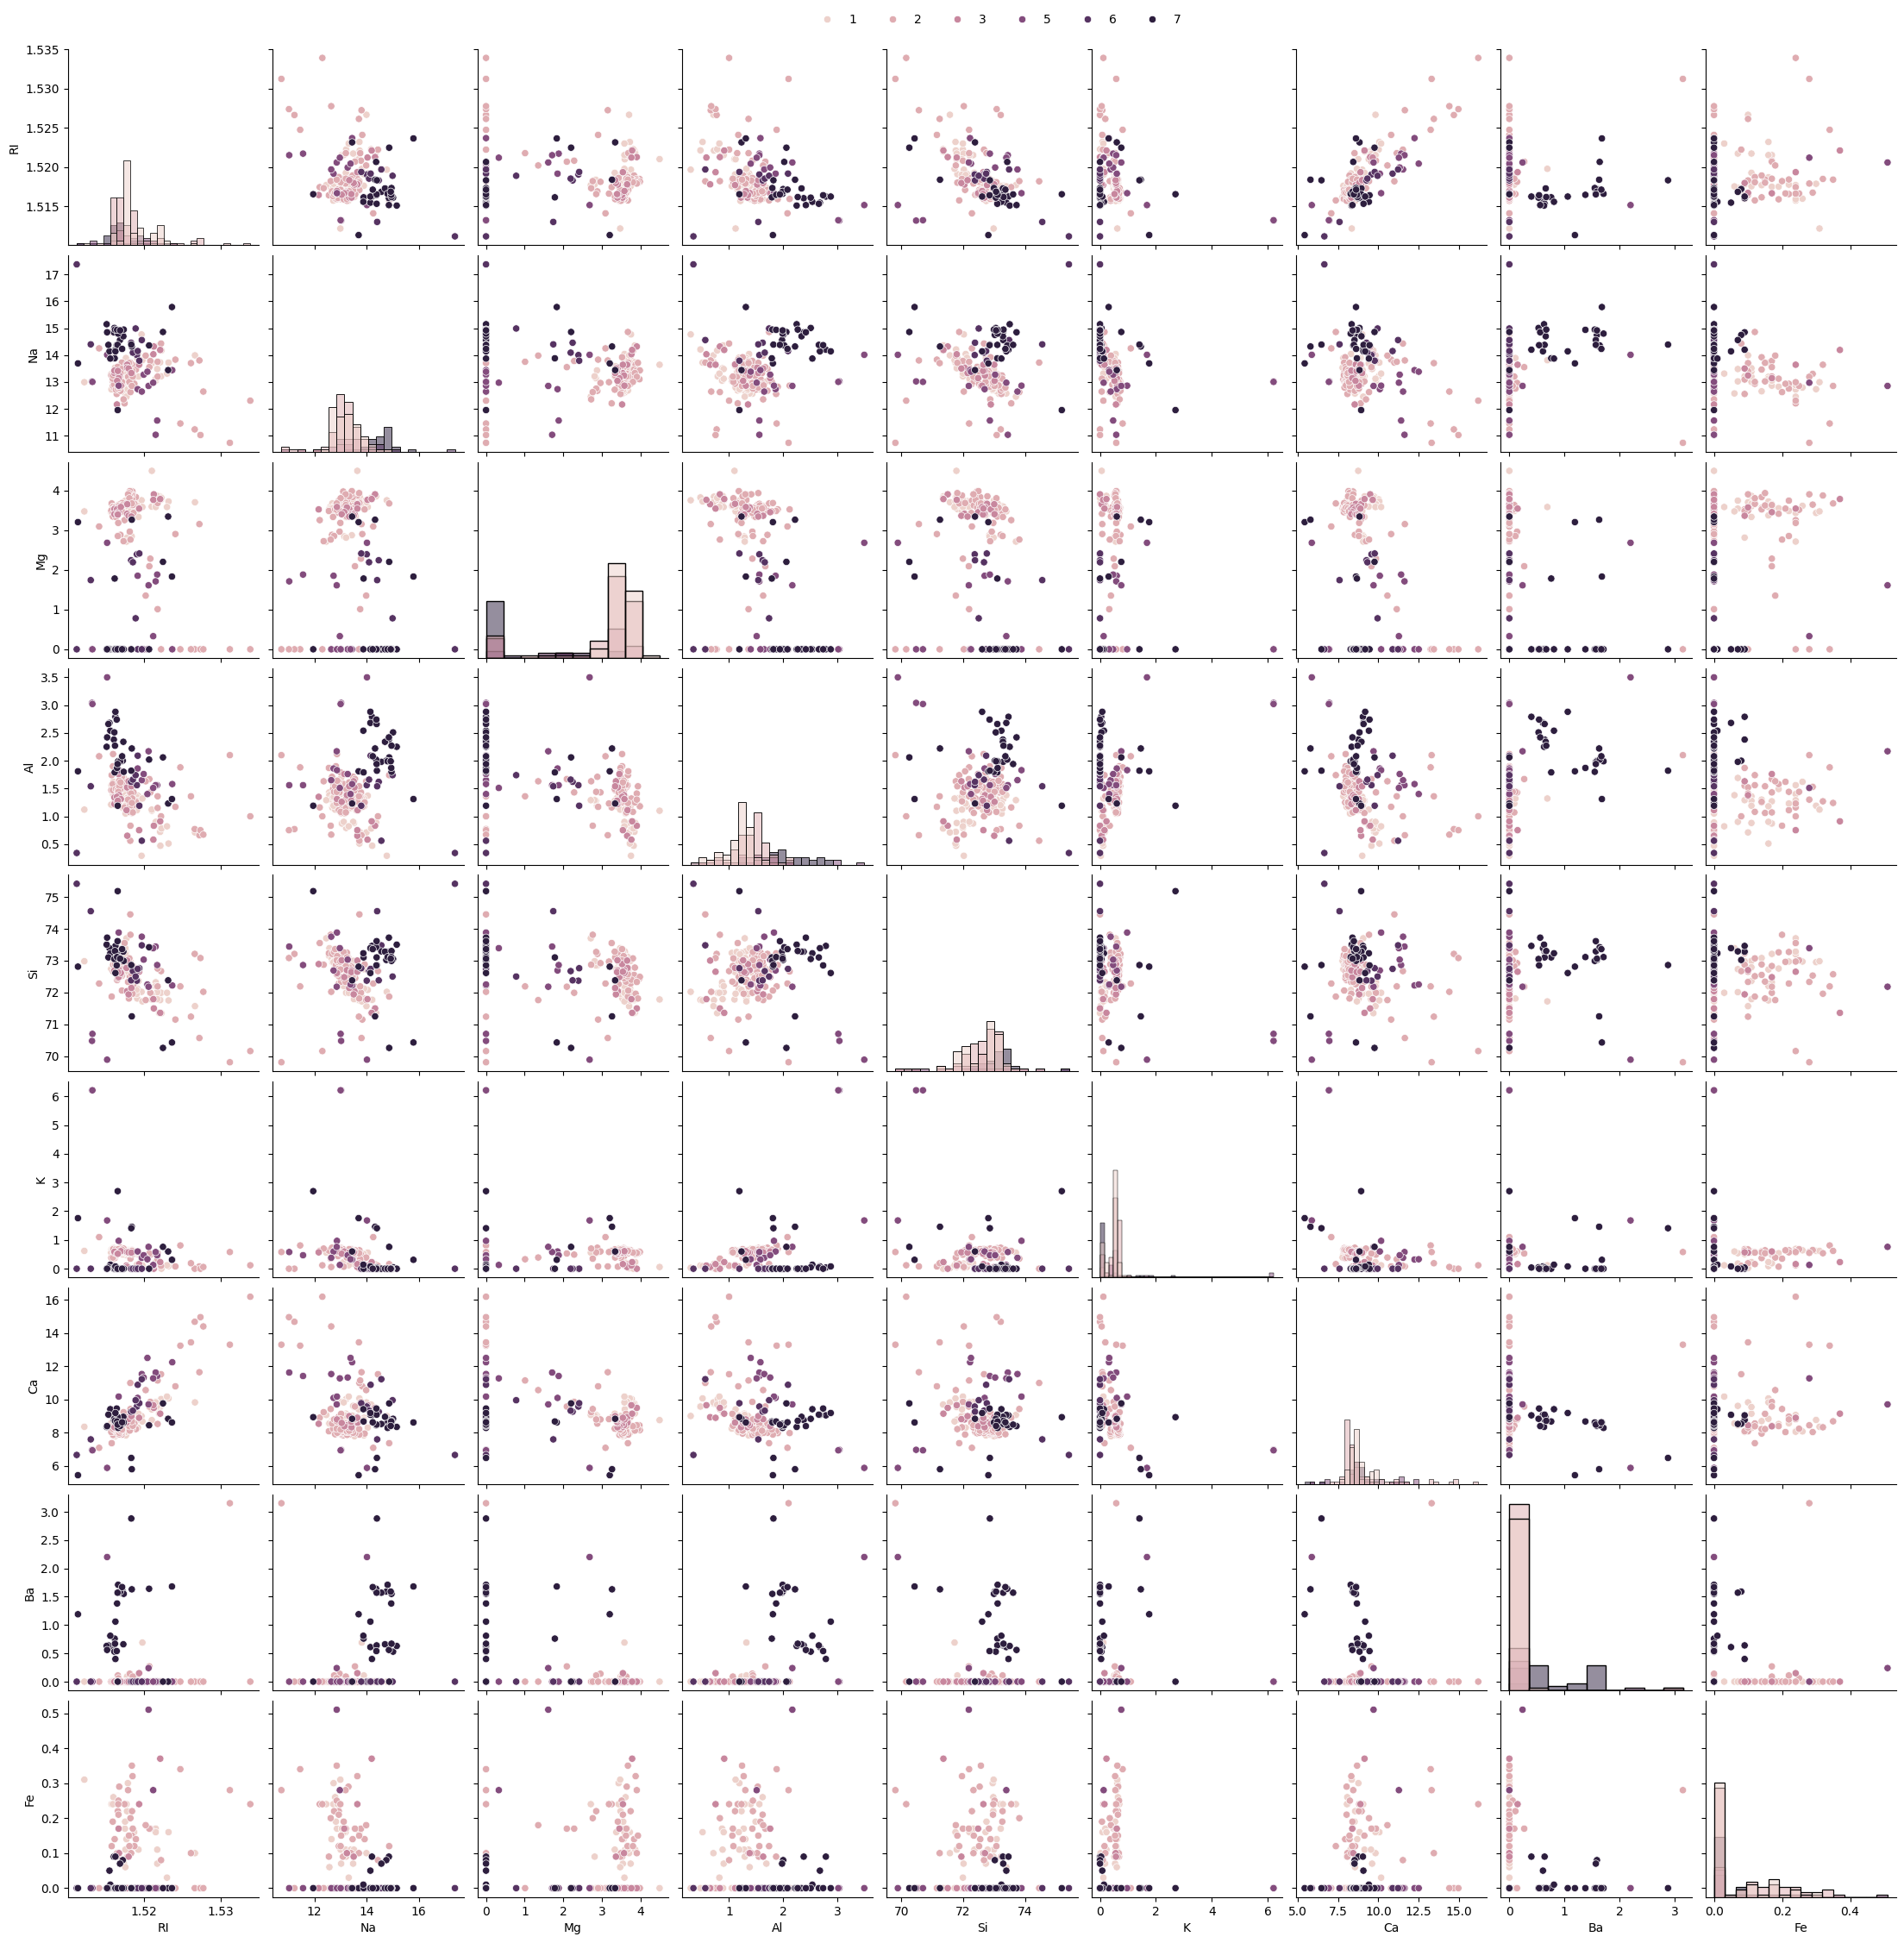

In [38]:
g=sns.pairplot(df,hue='Type_of_glass',diag_kind='hist')
sns.move_legend(g, "center",bbox_to_anchor=(.5, 1),ncol=9, title=None)
for t, l in zip(g._legend.texts, unique_classes):
    t.set_text(l)

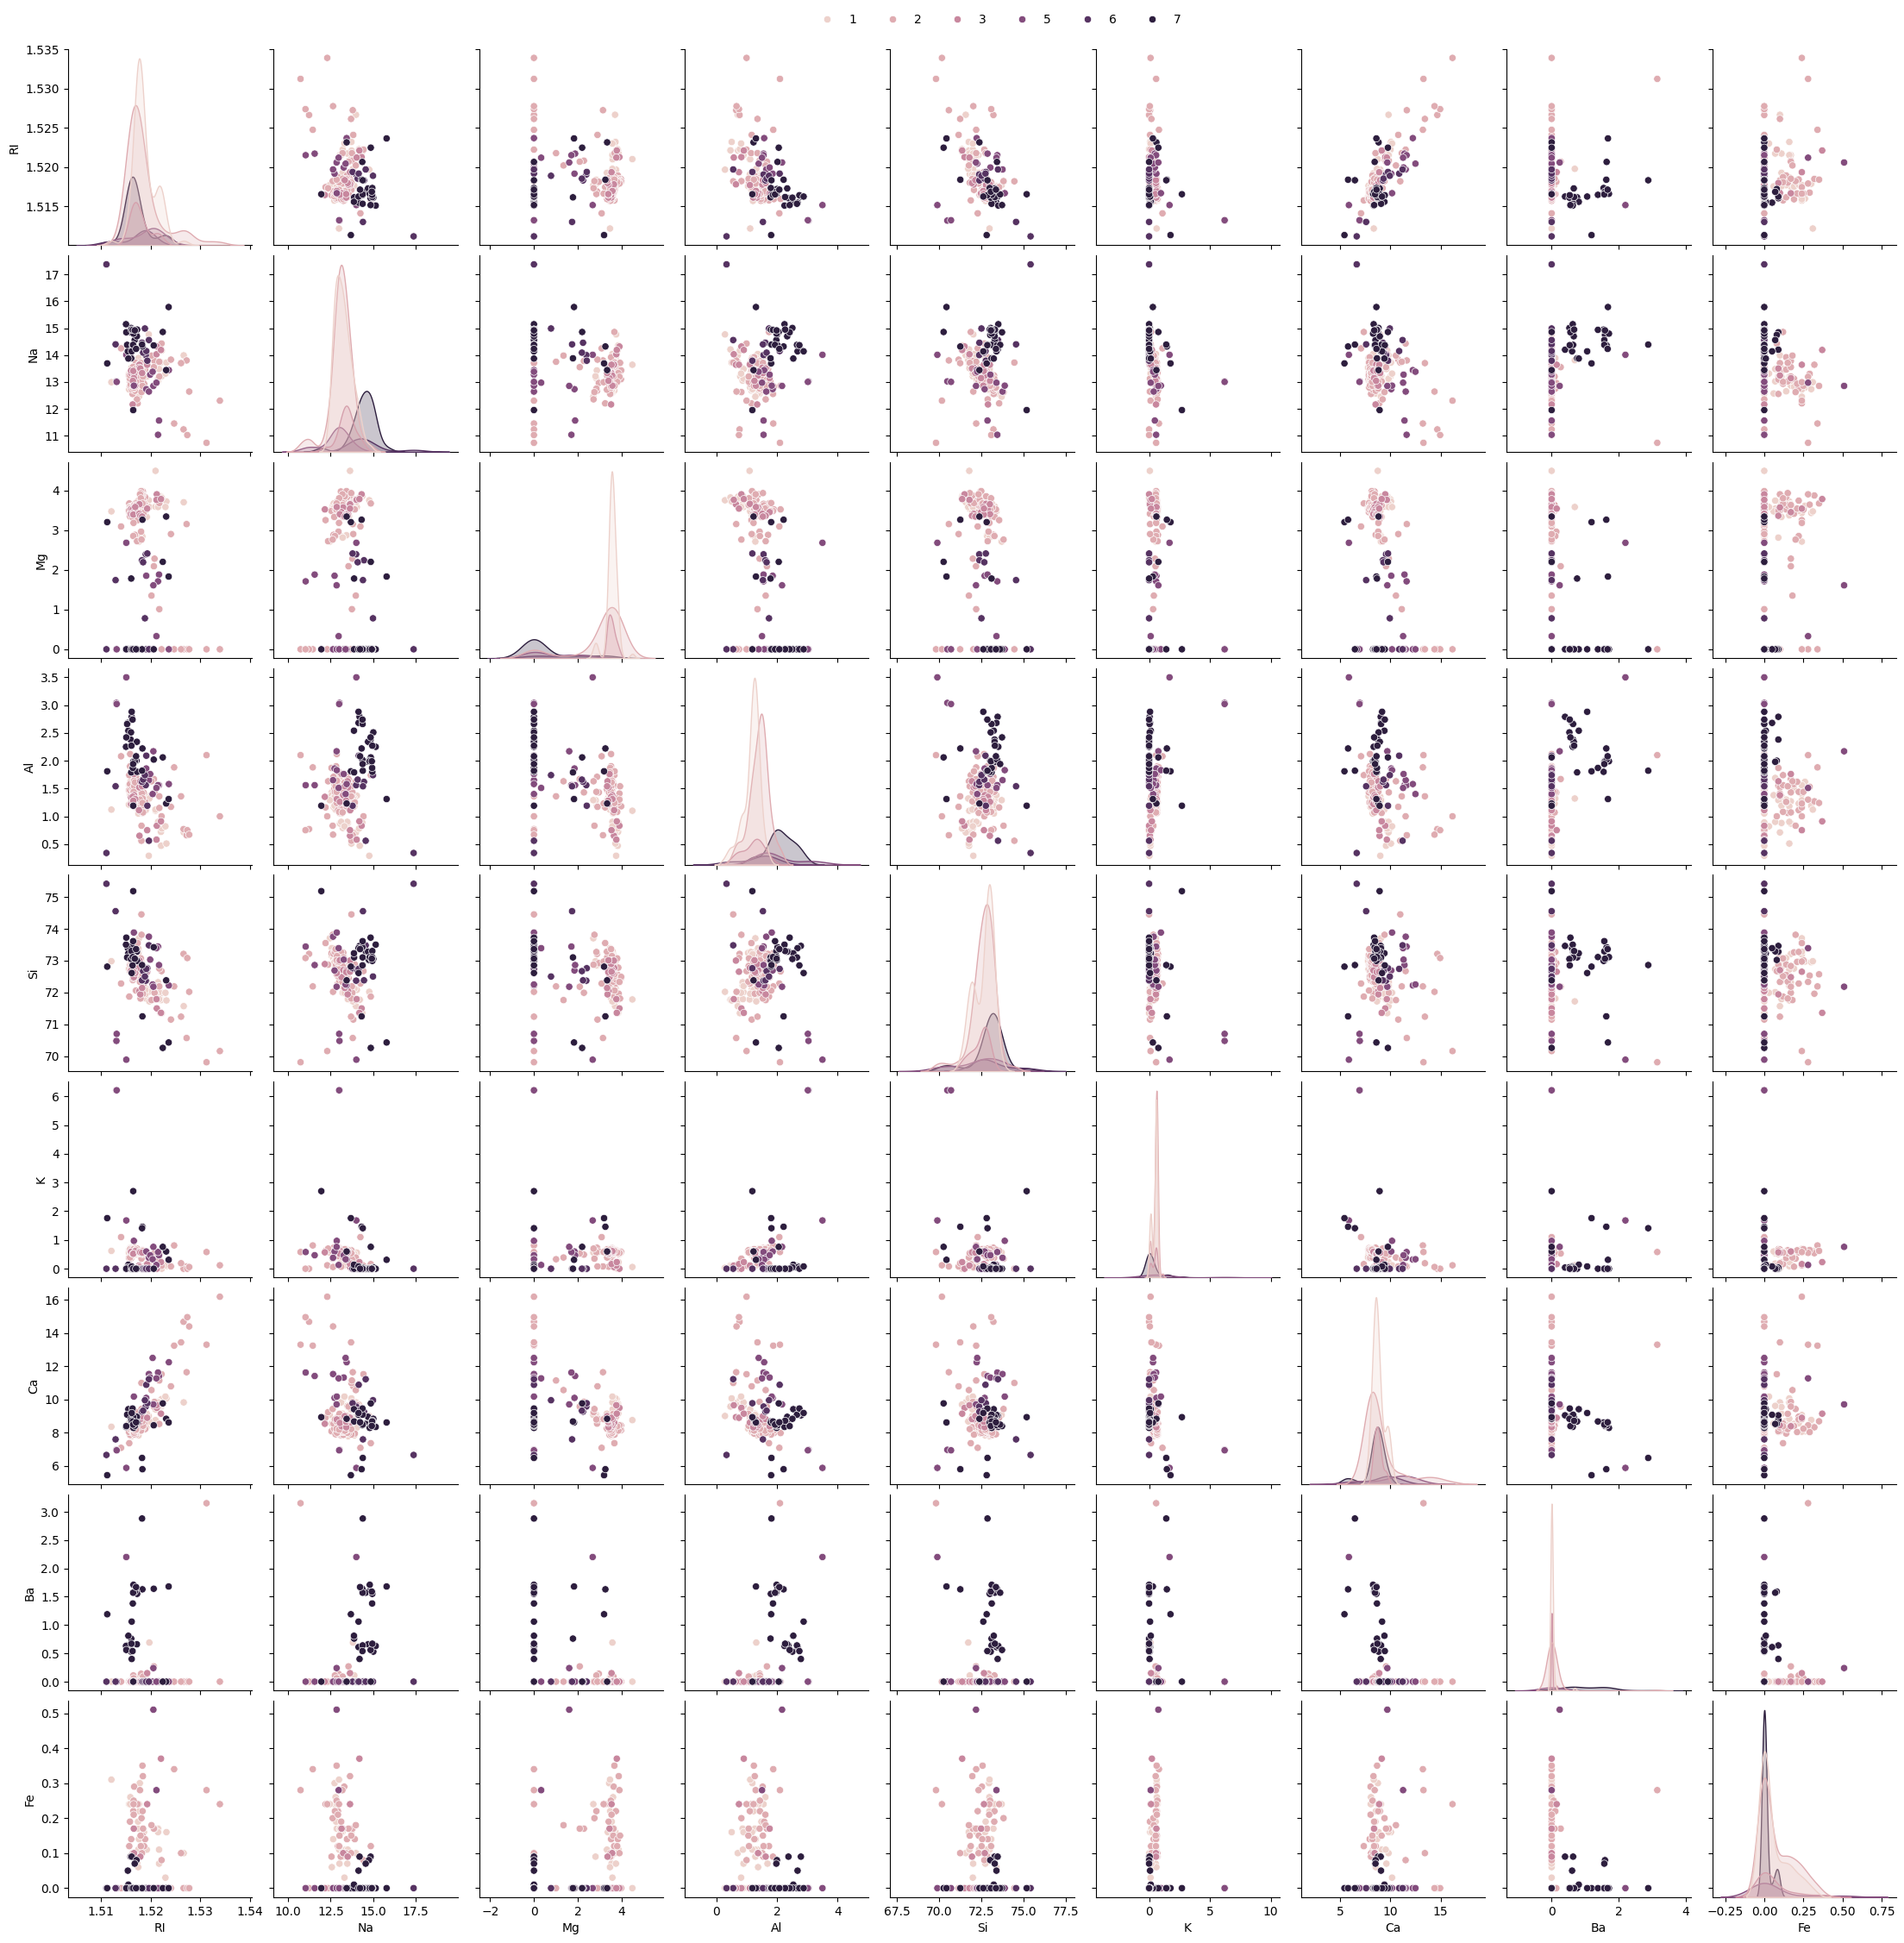

In [39]:
g=sns.pairplot(df,hue='Type_of_glass',diag_kind='kde')
sns.move_legend(g, "center",bbox_to_anchor=(.5, 1),ncol=9, title=None)
for t, l in zip(g._legend.texts, unique_classes):
    t.set_text(l)

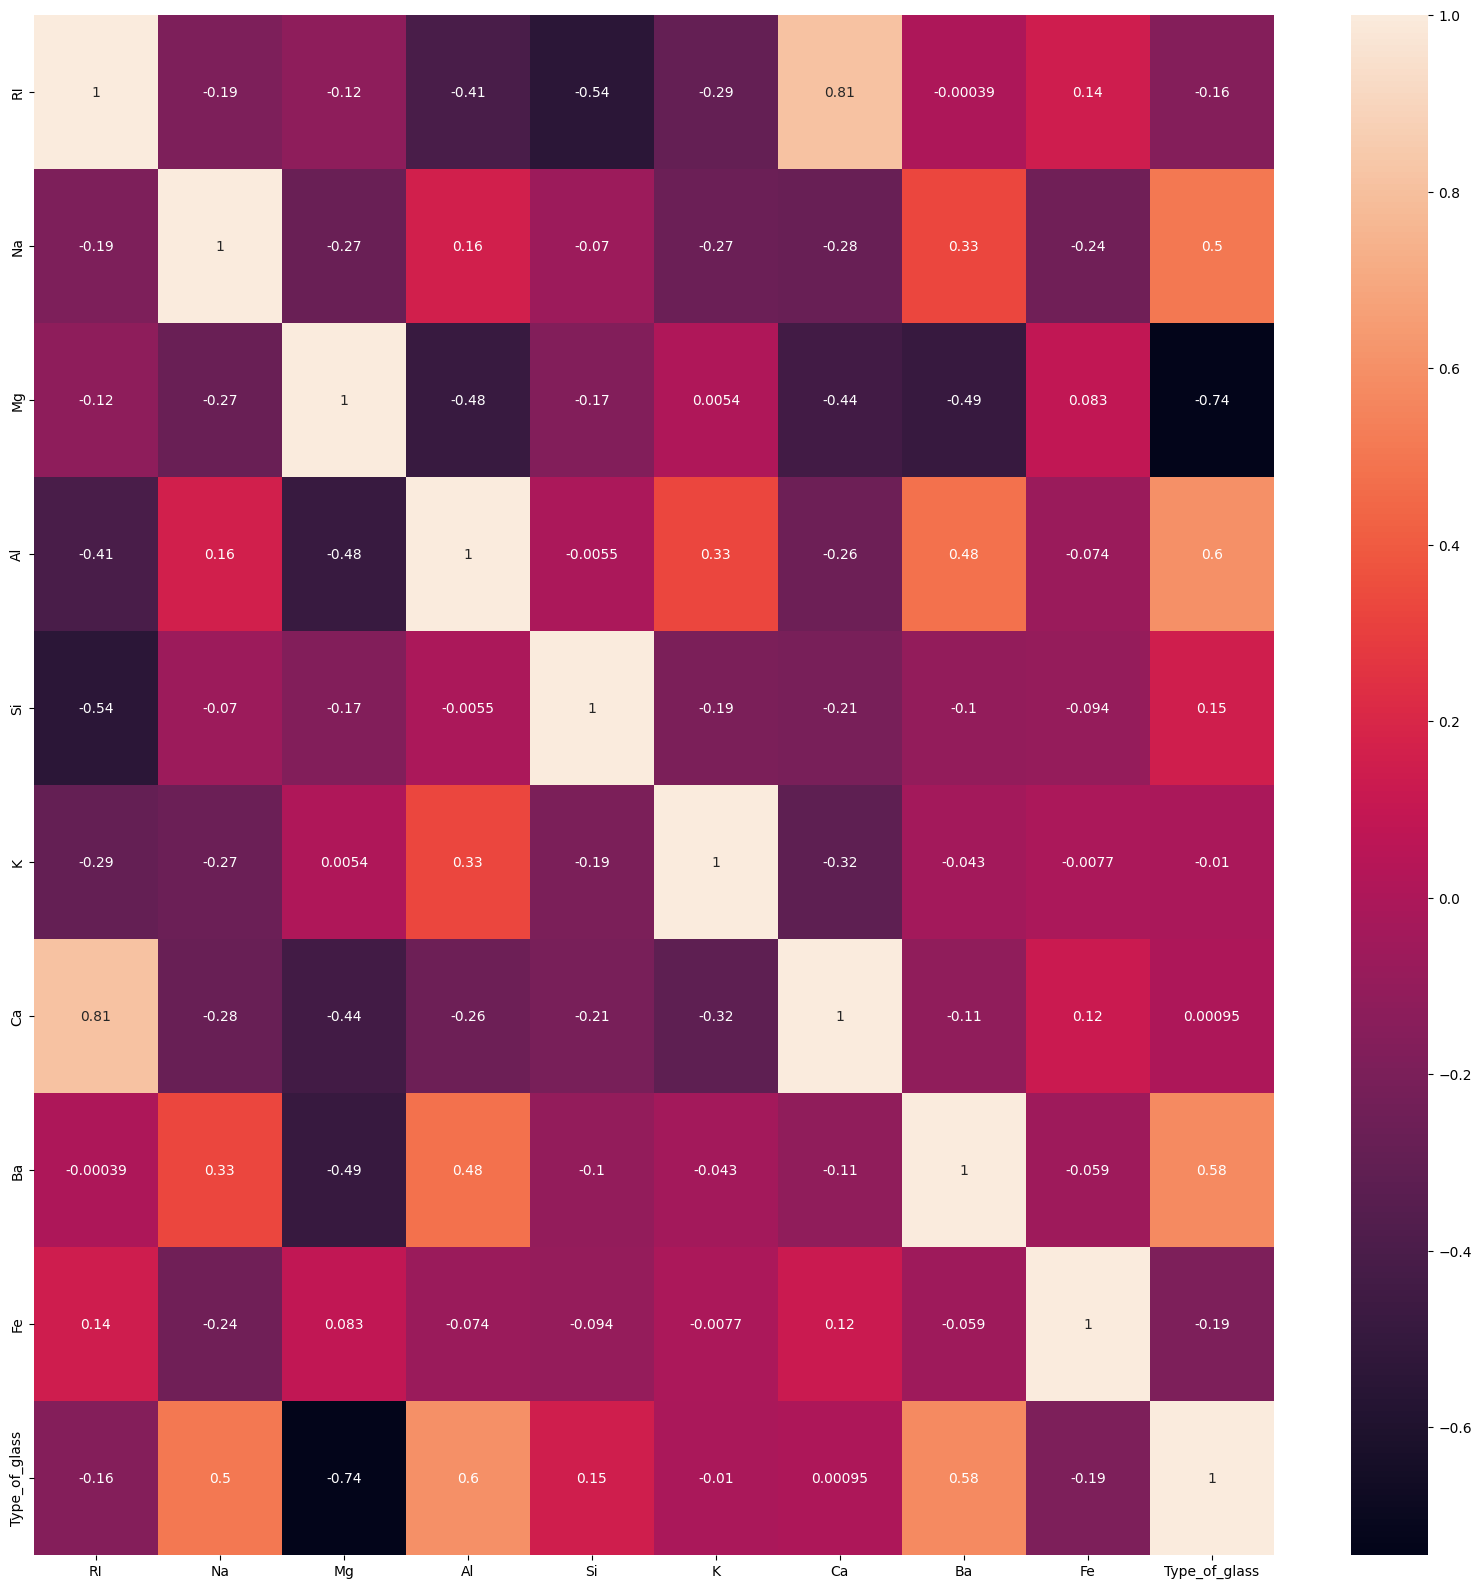

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Training Models

In [43]:
X,y = df.drop(columns='Type_of_glass',axis=1),df['Type_of_glass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes 

In [66]:
model = GaussianNB()
model.fit(X_train, y_train)
print(f'Priors: {model.class_prior_}')

Priors: [0.34502924 0.3625731  0.08187135 0.05263158 0.03508772 0.12280702]


In [67]:
pred = model.predict(X_test)
print('Classification Report')
print(f'{classification_report(y_test, pred)}')

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



<Axes: >

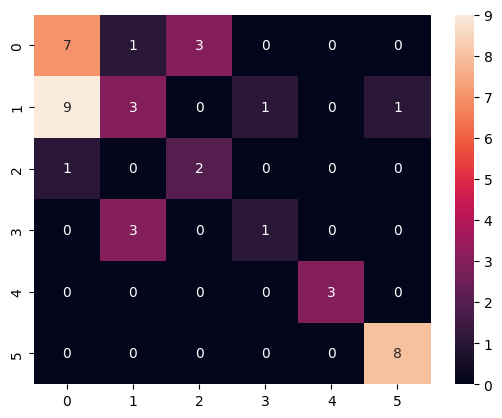

In [47]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

## LDA

In [63]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Priors: {model.priors_}')

Priors: [0.34502924 0.3625731  0.08187135 0.05263158 0.03508772 0.12280702]


In [64]:
pred = model.predict(X_test)
print('Classification Report')
print(f'{classification_report(y_test, pred,zero_division=0)}')

Classification Report
              precision    recall  f1-score   support

           1       0.53      0.91      0.67        11
           2       0.80      0.57      0.67        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       0.88      0.88      0.88         8

    accuracy                           0.70        43
   macro avg       0.64      0.63      0.62        43
weighted avg       0.70      0.70      0.68        43



<Axes: >

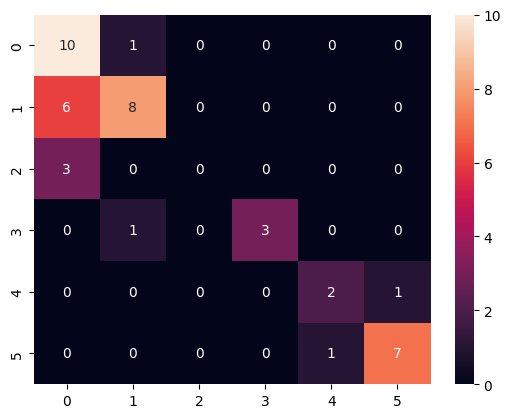

In [65]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

## QDA

In [68]:
model = QuadraticDiscriminantAnalysis(reg_param=0.5)
model.fit(X_train, y_train)
print(f'Priors: {model.priors_}')

Priors: [0.34502924 0.3625731  0.08187135 0.05263158 0.03508772 0.12280702]


C:\Users\Jovan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [69]:
pred = model.predict(X_test)
print('Classification Report')
print(f'{classification_report(y_test, pred,zero_division=0)}')

Classification Report
              precision    recall  f1-score   support

           1       0.46      1.00      0.63        11
           2       0.50      0.21      0.30        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.58        43
   macro avg       0.59      0.51      0.49        43
weighted avg       0.58      0.58      0.52        43



<Axes: >

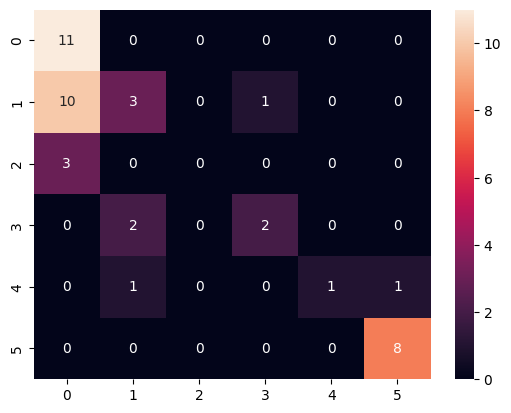

In [70]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

## Заклучок:
Со користење на наивен баесов класификатор заедно со дискриминантните анализа QDA LDA кои работат заедно на ист принцип може да заклучи дека  LDA  и покрај тоа што од останатите модели има најдобра прецизност при предвидувањето сепак овој модел не може воопшто да ја предвиди y-class 3. Додека пак наивниот баесов класификатор можеше да ги предвиди сите класи од таргет колоната но со слаба прецизност. И на крај како најлош модел за предвидување е QDA поради ниската прецизност и поради невозможноста да ја предвиди y-class 3